https://colab.research.google.com/drive/1ZYeebj9e1Gs3BaJzR82LqclLKls5-mTx
# **Lab4 : Function Approximation**
**Patrik Svensson**

# **Abstract**

This lab will explore the area of function approximations. There are many different methods to accomplish this, but in this report we will mainly focus on $L_2$ projections. The result was an implementation in Python together with a visual test that shows the graph of an approximated function.

# **Set up environment**

To set up the environment, run the two following lines of code.

In [0]:
import numpy as np
import unittest
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

# **Introduction**

Sometimes it is not feasible to use a function, one reason to this could be that it is too slow to compute the function. To mitigate this, it is possible to do an approximation of the function instead.


# **Methods**


##  L2 Projection in 1D
According to (9.13) in the lecture notes, the formula:

$P_hf(x) = \sum_{j=0}^{m+1}\alpha_j\phi_j(x)$

This formula is used for $L^2$ projection of a function $f$ belonging to $L^2(I)$ onto a space of continuous piecewise linear polynomials $V_h^{(1)}$, in which $I$ is an interval with $m$ nodes. $\phi(x)$ (by 9.7 in lecture notes) and $f(x)$ are known, the only thing we need to compute is the $a$. We can compute the $\alpha$ from the following linear equation:

$A\alpha = b$

Where $A$ is the mass matrix, and each element are given by $a_{ij} = (\phi_j, \phi_i)$. $b$ is the load vector, and each element is given by $b_i = (f,\phi_i)$. $\alpha$ is called the solution vector. 

According to the lecture notes (9.14):

$a_{ii} = \frac{h_i}{3} + \frac{h_{i + 1}}{3}$

According to lecture notes (9.15):

$a_{ii+1} = \frac{h_{i+1}}{6}$

Accoding to lecture notes (9.16):

$a_{ii-1} = \frac{h_i}{6}$

Accoding to lecture notes (9.17):

$b_i = (f,\phi_i) = \int_{0}^{1} f(x)\phi_i(x)dx$ which can be further expanded to:
$b_i = f(x_i)(\frac{h_i}{2} + \frac{h_{i+1}}{2})$ according to (1.74) in *The Finite Element Method: Theory, Implementation, and Practice* by Mats G. Larsson, Fredrik Bengzon.

To calculate the approximation of the function that we approximated with $L_2$ projection:

$P_hf(x) = \sum_{j=0}^{m+1}\alpha_j\phi_j(x)$

We can plug in the $\alpha$ values that we have obtained. The $\phi(x)$ values can be obtained from (9.7) in the lecture notes.

$\phi_i(x) = \lambda_{k,1}(x)$ if $x \in I_k$

$\phi_i(x) = \lambda_{k+1,1}(x)$ if $x \in I_{k + 1}$

$\phi_i(x) = 0$ if $x \neq I_k \cup I_{k + 1}$

In [0]:
def L2Projection1D(function, mesh):
  A = np.zeros((mesh.shape[0], mesh.shape[0]))
  b = np.zeros(mesh.shape[0])

  for i in range(A.shape[0]):
    if(i == (A.shape[0] - 1)):
      interval_size = abs(mesh[i] - mesh[i - 1])
      A[i][i] = interval_size / 3
      A[i][i-1] = interval_size / 6
    elif (i == 0):
      next_interval_size = abs(mesh[i] - mesh[i + 1])
      A[i][i] = next_interval_size / 3
      A[i][i + 1] = next_interval_size / 6

    else:
      interval_size = abs(mesh[i] - mesh[i - 1]) 
      next_interval_size = abs(mesh[i] - mesh[i + 1])
      A[i][i] = interval_size / 3 + next_interval_size / 3
      A[i][i + 1] = next_interval_size / 6
      A[i][i - 1] = interval_size / 6


  for i in range(A.shape[0] - 1):
    interval_size = 0
    function_val = function(mesh[i])
    if(i == (A.shape[0] - 1)):
      interval_size = abs(mesh[i] - mesh[i-1])
    elif (i == 0):
      interval_size = abs(mesh[i] - mesh[i + 1])
    else:
      interval_size = abs(mesh[i] - mesh[i-1]) + abs(mesh[i] - mesh[i + 1])

    b[i] = interval_size * function_val

  # Compute alphas
  x = np.linalg.solve(A, b)

  return x


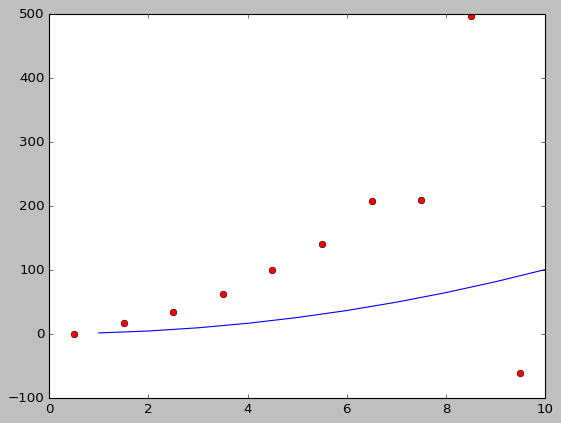

In [0]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
function = lambda x:x**2 
alphas = L2Projection1D(function, x)
y = np.array([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])

for i in range(len(x)):
  phi = 0
  if(i > 0):
    phi += (y[i] - x[i - 1]) / abs(x[i - 1] - x[i])

  if(i < len(x) - 1):
    phi += (x[i + 1] - y[i]) / abs(x[i + 1] - x[i])

  # Phi * alpha
  v = alphas[i] * phi
  plt.plot(y[i], v, 'ro')

plt.plot(x, function(x))
 
plt.show()


# **Results**
The results of the implemetation can be seen in the graph in the previous section.

# **Discussion**
The implementation of the algorithm is only quality assured by a visual comparison. It would be better if there was an quantitative method for assuring the correctness. Furthermore, I'm not sure if the implementation is right since the graphs diverge from each other.